# O Campeonato Brasileiro está ficando mais injusto? (UPDATE)
### Uma análise exploratória usando o Coeficiente de Gini  


## Introdução

Como o Campeonato Brasileiro terminou oficialmente neste domingo com o Flamengo campeão e com todas as rodadas encerradas, vamos novamente realizar a mesma pergunta que inicei no meu post que indaga: "**[O Campeonato Brasileiro está ficando mais injusto?](https://flavioclesio.com/2019/10/29/o-campeonato-brasileiro-esta-ficando-mais-injusto/)**"

Mais uma vez fui na Wikipedia, e atualizei os dados já incluindo o ano de 2019. 



## A desigualdade estrutural no Campeonato Brasileiro é uma tendência?

Na primeira análise feita aqui no blog eu cheguei a conclusão de que "**Sim. Com o uso do Coeficiente de Gini como métrica para mensurar se há uma desigualdade estrutural mostrou que existem sim elementos latentes dessa desigualdade**".

Dado a campanha excepcional do Flamengo que não só bateu o recorde de números de pontos em uma única edição, como também [se considerarmos apenas os jogos em casa e descartando todos os pontos fora o Flamengo ainda sim não seria rebaixado (37 jogos - 11v 4e 4d)](https://twitter.com/tiagotvv/status/1203809611821780992) (Fonte: Tiago Vinhoza).


Mas como estamos falando aqui da **variância da distribuição dos pontos dentro desta edição Brasileirão** um [fato colocado pelo @Impedimento foi que esta edição teve a **Menor pontuação efetivamente conquistada por um time que se salvou: 39 (Ceará)** sendo que eram necessários apenas 37 para se salvar](https://twitter.com/impedimento/status/1203783319261007872). Ou como disse o [Tiago Vinhoza, uma estratégia só de empates em todos os jogos já seria suficiente para se salvar.](https://twitter.com/tiagotvv/status/1203819653149155329)

Sem mais demora, vamos rodar os mesmos scripts agora com os dados atualizados.

In [1]:
# Imports, 538 theme in the charts and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('fivethirtyeight')

df_brasileirao = pd.read_csv('dataset-2003-2019.csv', delimiter=';')

print(f'Number of Records: {df_brasileirao.shape[0]} - Number of Columns: {df_brasileirao.shape[1]}')

# Loading Check
df_brasileirao.tail(20)

Populating the interactive namespace from numpy and matplotlib
Number of Records: 350 - Number of Columns: 12


,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
330,2019,1,Flamengo,90,38,28,6,4,86,33,53,81
331,2019,2,Santos,74,38,22,8,8,60,33,27,64
332,2019,3,Palmeiras,74,38,21,11,6,61,32,29,64
333,2019,4,Grêmio,65,38,19,8,11,64,39,25,57
334,2019,5,Athletico Paranaense,64,38,18,10,10,51,32,19,56
335,2019,6,São Paulo,63,38,17,12,9,39,30,9,55
336,2019,7,Internacional,57,38,16,9,13,44,39,5,50
337,2019,8,Corinthians,56,38,14,14,10,42,34,8,49
338,2019,9,Fortaleza,53,38,15,8,15,50,49,1,46
339,2019,10,Goiás,52,38,15,7,16,46,64,–18,45


In [2]:
# Gini function as PyGini package
def gini(arr, eps=1e-8):
    '''
    Reference: PyGini (I owe you a beer @o_guest)
    https://github.com/mckib2/pygini/blob/master/pygini/gini.py
    
    Calculate the Gini coefficient of a numpy array.
    Notes
    -----
    Based on bottom eq on [2]_.
    References
    ----------
    .. [2]_ http://www.statsdirect.com/help/
            default.htm#nonparametric_methods/gini.htm
    '''

    # All values are treated equally, arrays must be 1d and > 0:
    arr = np.abs(arr).flatten() + eps

    # Values must be sorted:
    arr = np.sort(arr)

    # Index per array element:
    index = np.arange(1, arr.shape[0]+1)

    # Number of array elements:
    N = arr.shape[0]

    # Gini coefficient:
    return(np.sum((2*index - N - 1)*arr))/(N*np.sum(arr))


def get_gini_df(df):
    """Generate DF with Gini Index

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data

    Returns
    -------
    gini_df : Pandas Dataframe
      Returns a Pandas Dataframe with the year, team and gini index

    """    
    gini_per_year = []
    
    for year in df['year'].unique():
        championship_index = gini(np.array(df[df['year'] == year]['points']))
        champion = (df[(df['year'] == year) & (df['position'] == 1)]['team'])
        gini_per_year.append((year, champion.values[0], round(championship_index, 4)))
        
    gini_df = pd.DataFrame(gini_per_year)
    gini_df.columns = ['year', 'team', 'gini']
    
    # Indexing the date field for graph it smoothly
    gini_df.set_index('year', inplace=True)

    return gini_df

## Ranking de desigualdade entre todas as edições do Brasileirão usando o Coeficiente de Gini

In [3]:
gini_df = get_gini_df(df_brasileirao)
gini_df.sort_values(by=['gini'], ascending=False)

,team,gini
year,,
2019,Flamengo,0.1746
2018,Palmeiras,0.1449
2014,Cruzeiro,0.1413
2012,Fluminense,0.1355
2016,Palmeiras,0.1349
2010,Fluminense,0.1318
2006,São Paulo,0.1287
2015,Corinthians,0.1236
2013,Cruzeiro,0.1202


Diferentemente da nossa última análise em que a edição de **2018** (Palmeiras campeão) era a mais desigual até então, essa edição com o Flamengo Campeão teve um **aumento de 17% ((1 - (0.1449/0.1746)) x 100)** na desigualdade em relação ao nuúmero de pontos conquistados, o que mostra que a tendência dessa desigualdade veio pra ficar. 

Vamos olhar com calma essa edição de 2019.

In [4]:
df_brasileirao[df_brasileirao['year'] == 2019]

,year,position,team,points,games,victories,draws,losses,goals_scored,goals_against,goals_difference,perc_points_won
330,2019,1,Flamengo,90,38,28,6,4,86,33,53,81
331,2019,2,Santos,74,38,22,8,8,60,33,27,64
332,2019,3,Palmeiras,74,38,21,11,6,61,32,29,64
333,2019,4,Grêmio,65,38,19,8,11,64,39,25,57
334,2019,5,Athletico Paranaense,64,38,18,10,10,51,32,19,56
335,2019,6,São Paulo,63,38,17,12,9,39,30,9,55
336,2019,7,Internacional,57,38,16,9,13,44,39,5,50
337,2019,8,Corinthians,56,38,14,14,10,42,34,8,49
338,2019,9,Fortaleza,53,38,15,8,15,50,49,1,46
339,2019,10,Goiás,52,38,15,7,16,46,64,–18,45


Aos moldes da nossa última análise, vamos ver alguns pontos da tabela final:

   - O Flamengo finalmente furou a impressionante barreira dos **90 pontos** em campeonato de 20 times; o que é para efeitos de comparação [é o mesmo número de pontos que o Real Madrid e/ou Barcelona fazem em temporadas avassaladoras no Campeonato Espanhol](https://pt.wikipedia.org/wiki/La_Liga_de_2009%E2%80%9310) o que indica que houve uma disparidade muito grande dentro de campo;
   
   - Como já colocado acima, uma estratégia de apenas empates (38 pontos) já seria o suficiente para sair do rebaixamento;
   
   - O Avaí foi o saco de pancadas desse brasileirão em que cedeu 72 pontos (24 * 3) ao longo da tabela para inúmeros times, e perdeu 22 pontos em empates (ou tirou de outros times). Alem disso tivemos além do Avaí mais 4 times com mais de 20 derrotas (Botafogo, CSA, e Chapecoense). 
   
   - Tivemos na verdade 4 Campeonatos: Campeonato 1 que eu chamaria de **"Passeio Flamenguista"**; Campeonato 2 que seria **"Briga pelo Vice estrelando Santos e Palmeiras"**; e Campeonato 3 **"Vagas na Libertadores e Sulamericana"**; e o último campeonato (4) que seria **"Quem vai ser rebaixado com o CSA, Chape e Avaí?"**; e
   
   - Entre o 7o Colocado (Internacional) até o penúltimo colocado (Chapecoense) a maior diferença de pontos foram de 4 pontos.


Em linhas gerais o que podemos ver é que tivemos alguns blocos de times com um determinado número de pontos, mas o grosso de todos os pontos foram para os times de cima, em especial o Campeão e os dois vice campeões. 

Vamos agora olhar a evolução dessa desigualdade ao longo do tempo, e comparar com as edições anteriores.  

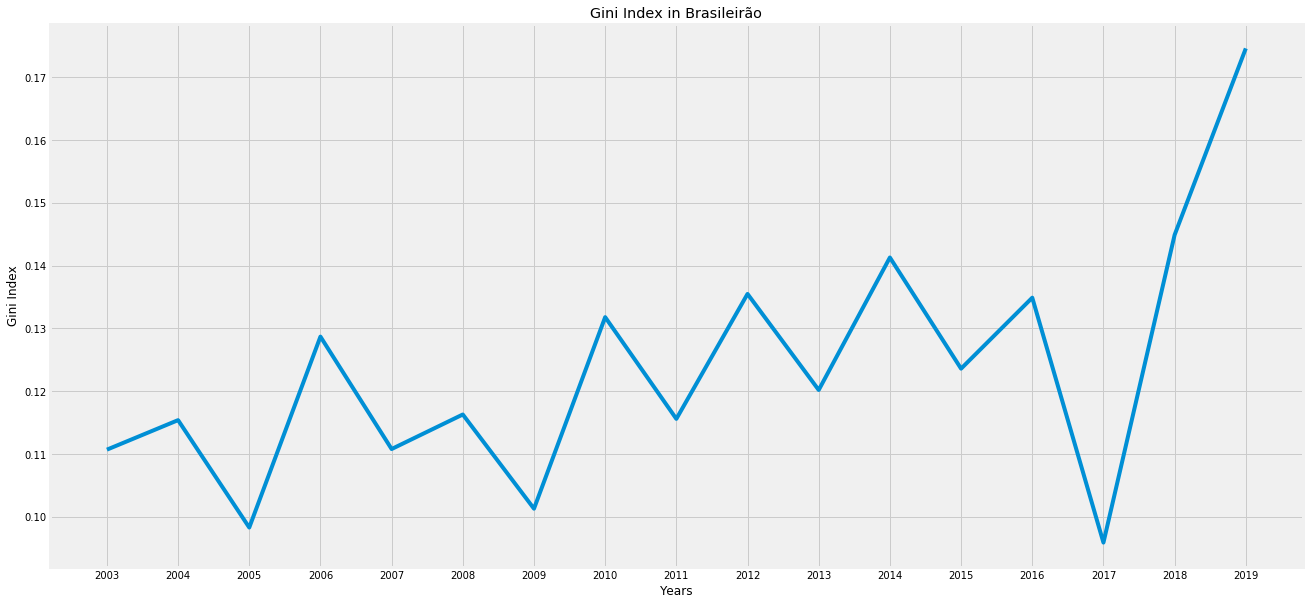

In [5]:
def get_graph_ts(df, column, title, label):
    """Generate graph of a Time Series

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    column : string
      Column with the metric to be ploted
    title : string
      Graph title to be displayed
    label : string
      Name of the series that will be placed
      as legend
      
    Returns
    -------      

    """      
    plt.figure(figsize=(20,10))
    plt.title(title)
    plt.xlabel('Years')
    plt.ylabel('Gini Index')
    plt.plot(df[column], label=label)
    plt.xticks(gini_df.index)

get_graph_ts(gini_df,
             'gini',
             'Gini Index in Brasileirão',
             'Gini Index',
            )

Na minha última análise eu tinha feito a seguinte consideração:

"_Algo surpreendente é que os **vales costumam acontecer nos anos ímpares** e os **picos nos anos pares**. Isso talvez seja explicado por algum efeito externo, tal como as **Olimpíadas** e** Copa do Mundo** que ocorrem em anos pares. E uma hipótese bem fraca, mas ainda sim é uma hipótese._"

Ou seja: O Brasileirão desse ano não somente mostrou que essa era uma hipótese que não faz mais sentido, como mostra agora que é **um outlier dentro de todas as edições de pontos corridos, em termos de desigualdade dos times**.

Para suavizar um pouco esse efeito, vamos considerar aos moldes do post anterior apenas uma média móvel considerando um recuo de 3 anos. 

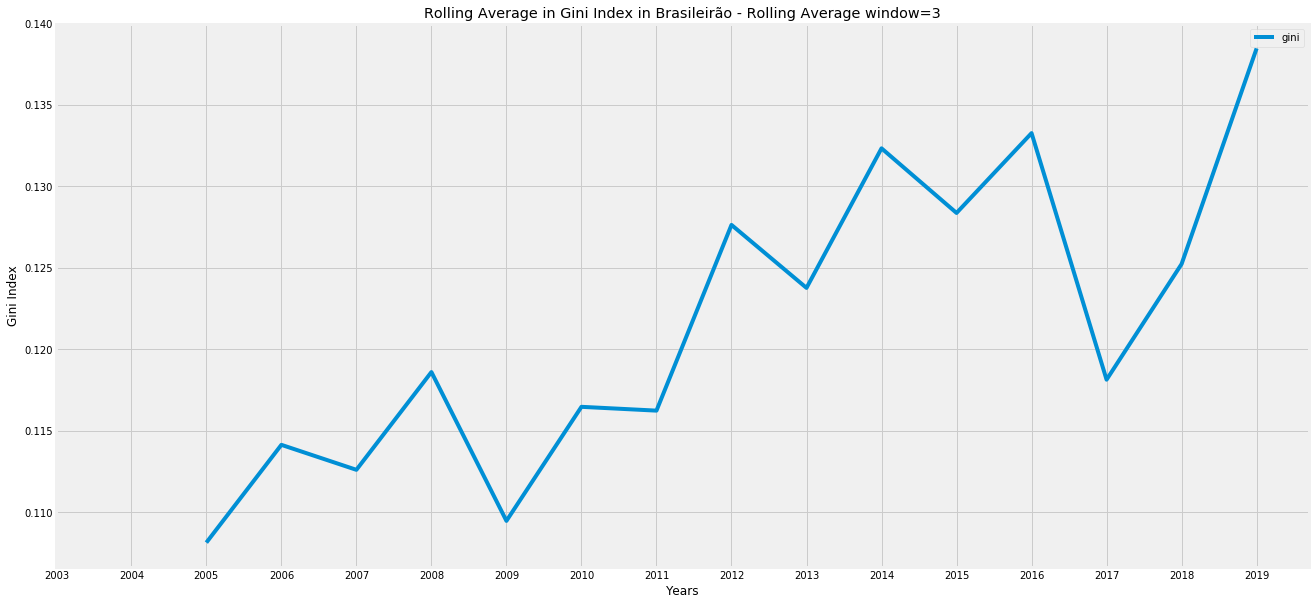

In [6]:
# Some graphs with rolling average
date_range = [2003, 2004, 2005, 2006, 2007,
              2008, 2009, 2010, 2011, 2012,
              2013, 2014, 2015, 2016, 2017,
              2018, 2019]

def get_graph_ts_rolling_average(ts, title, window, date_range=date_range):
    """Generate graph of a Time Series with a simple rolling average

    Parameters
    ----------
    ts : Pandas Dataframe column
      Dataframe column with a metric to be ploted
    title : Pandas Dataframe
      Graph title to be displayed
    window : int
      Rolling back window to be considered in the average
    date_range : Array
      Array to be used in the ploting. Matplotlib has a 
      very bad way to deal with that, so I need to use this
      workaround to place all years properly
      

    Returns
    -------

    """      
    plt.figure(figsize=(20,10))
    plt.plot(date_range, ts.rolling(window=window, center=False).mean(), label='gini');
    plt.title(f'{title}{window}')
    plt.xlabel('Years')
    plt.ylabel('Gini Index')
    plt.xticks(gini_df.index)
    plt.legend()
    
get_graph_ts_rolling_average(gini_df['gini'],
                             'Rolling Average in Gini Index in Brasileirão - Rolling Average window=',
                             3,
                            )    

Olhando com mais calma, podemos até mesmo pensar na hipótese de que _Não foi o ano de 2019 que foi um outlier, mas os anos de 2017 e 2009 que são os verdadeiros outliers em relação à desigualdade._

Aos moldes do post anterior, vamos remover o campeão e o pior time de todas as temporadas e recalcular novamente. 

In [7]:
def get_brasileirao_no_outliers(df):
    """Generate a DF removing the champion and the worst team of the championship

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    Returns
    -------
    df_concat : Pandas Dataframe
     Returns a Pandas Dataframe without the outliers

    """    
    
    df_concat = pd.DataFrame()

    for year in df['year'].unique():
        pos_min = df[df['year'] == year]['position'].min()
        pos_max = df[df['year'] == year]['position'].max()

        df_filtered = df[(df['year'] == year) \
                         & (~df['position'].isin([pos_min, pos_max]))]

        df_concat = df_concat.append(df_filtered)
    
    return df_concat


def get_gini(df):   
    """Generate a DF with the year and the following Gini Index calculated

    Parameters
    ----------
    df : Pandas Dataframe
      Dataframe with Brasileirão data
    Returns
    -------
    gini_df : Pandas Dataframe
     Returns a Pandas Dataframe with the year, and gini index    

    """  
    gini_per_year = []
    for year in df['year'].unique():
        championship_index = gini(np.array(df[df['year'] == year]['points']))
        gini_per_year.append((year, round(championship_index, 4)))
        
    gini_df = pd.DataFrame(gini_per_year)
    gini_df.columns = ['year', 'gini']
    
    # Indexing the date field for graph it smoothly
    gini_df.set_index('year', inplace=True)
        
    return gini_df

In [8]:
# Outlier removal
df_brasileirao_no_outliers = get_brasileirao_no_outliers(df_brasileirao)

In [9]:
df_brasileirao_no_outliers_gini = get_gini(df_brasileirao_no_outliers)
df_brasileirao_no_outliers_gini.sort_values(by=['gini'], ascending=False)

,gini
year,
2019,0.1376
2014,0.1217
2012,0.1145
2018,0.1139
2010,0.1129
2016,0.1084
2006,0.1029
2004,0.0994
2008,0.0992


Mesmo removendo o Avaí (pior time) e o Campeão (Flamengo) **ainda sim o campeonato de 2019 continua o mais desigual**. 

Vamos gerar o gráfico apenas para verificar se a tendência do aumento da desigualdade permanece ou não.

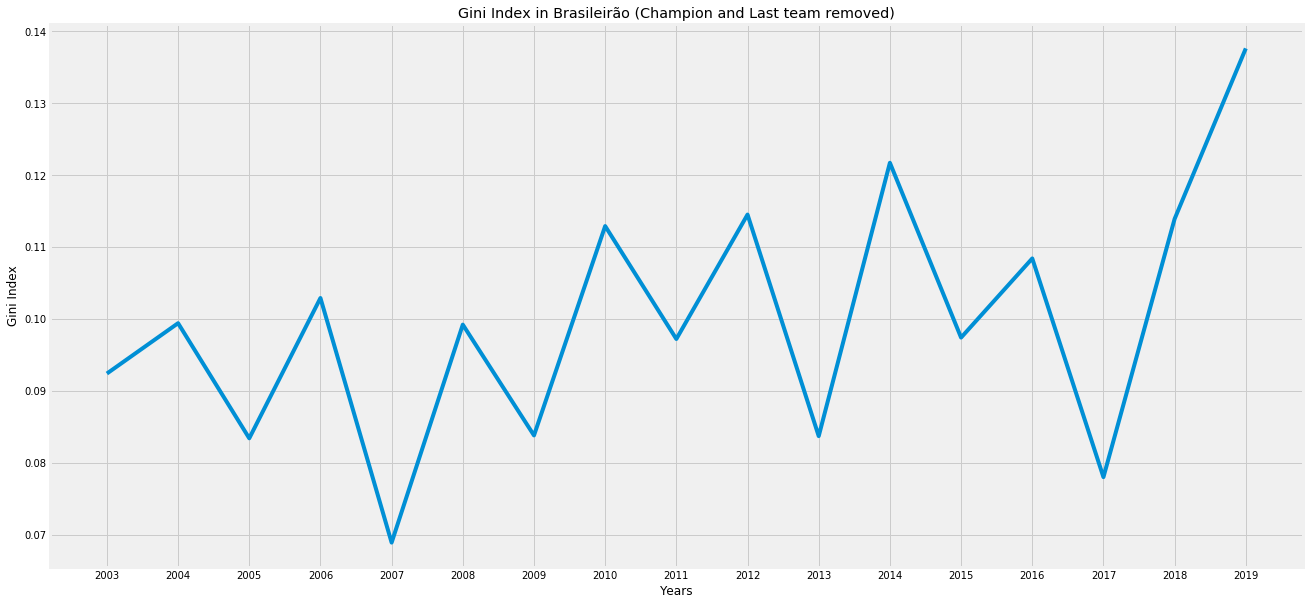

In [10]:
get_graph_ts(df_brasileirao_no_outliers_gini,
             'gini',
             'Gini Index in Brasileirão (Champion and Last team removed)',
             'Gini Index',
            )

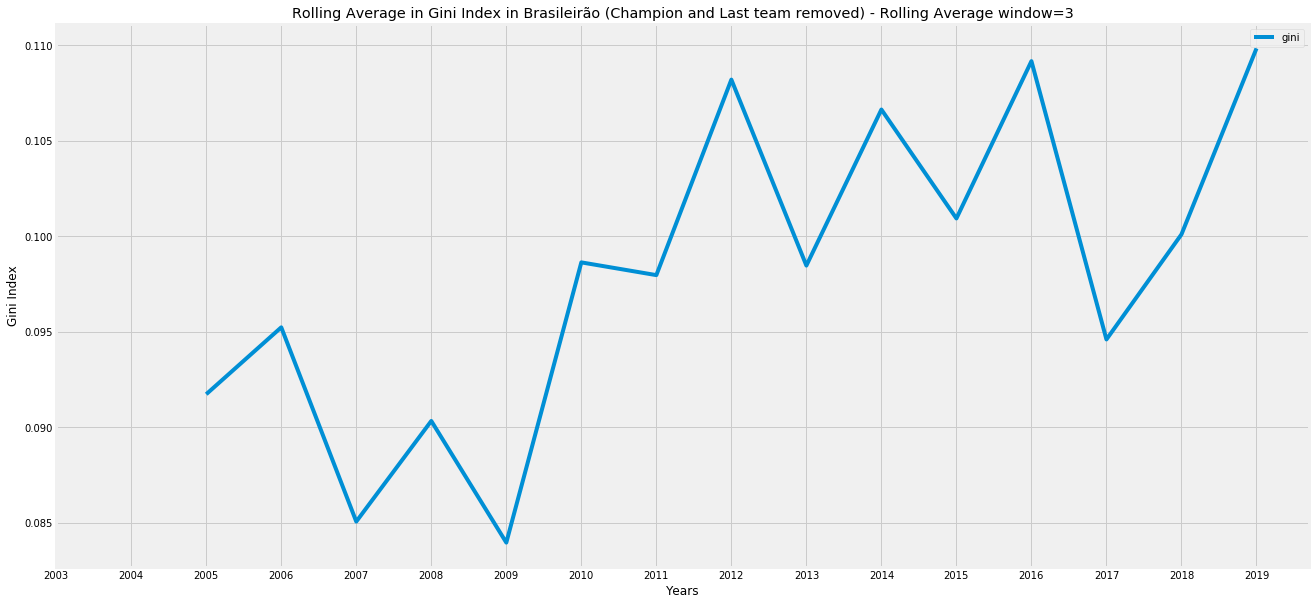

In [11]:
get_graph_ts_rolling_average(df_brasileirao_no_outliers_gini['gini'],
                             'Rolling Average in Gini Index in Brasileirão (Champion and Last team removed) - Rolling Average window=',
                             3,
                            )    

Olhando o Coeficiente de Gini removendo o campeão e o pior time, **podemos ver que ainda temos a tendência de aumento da desigualdade dentro da liga**.


## Conclusão e considerações para o futuro
Se tivermos que responder a nossa pergunta principal que foi "**O brasileirão está ficando mais injusto ao longo do tempo?**" a resposta seria:  


**"Sim. Existe uma esigualdade estrutural no Campeonato Brasileiro com uma tendência de alta, sendo que a edição de 2019 foi a mais desigual de todas."**.  

Aqui eu vou tomar a liberdade de realizar algumas considerações em relação ao que eu penso que pode estar acontecendo no Campeonato:

   - A [disparidade financeira](https://blogdomenon.blogosfera.uol.com.br/2019/08/08/aumenta-a-disparidade-financeira-entre-clubes-brasileiros/) é uma realidade. O Palmeiras que é um dos clubes que mais investem dinheiro têm foi **campeão 2 vezes, vice e 3o colocado**. [O Flamengo que fez investimentos na ordem de mais de 100 milhões de reais](https://globoesporte.globo.com/futebol/times/flamengo/noticia/flamengo-se-aproxima-de-r-200-mi-em-reforcos-no-ano-e-busca-dois-nomes-para-fechar-o-elenco.ghtml) mostrou que **gastar é o nome do jogo**;
   
   - Com essa _race arms_ em relação ao dinheiro e o seu papel na liga, o que vai acontecer **é que os investimentos vão ter que ser certeiros pois o risco de haver frustração de receitas e de títulos é muito grande**, [dado que o campeão ganha em dinheiro o equivalente a apenas 6 meses de salários](https://www.goal.com/br/not%C3%ADcias/brasileirao-2019-veja-a-premiacao-em-dinheiro-que-cada-time/wodfl5qh5cbr1hvme355b4zw8). Ou seja, quem não for campeão corre o risco o real de tomar prejuízos massivos;
   
   - Dado o que foi colocado acima, eu penso que os Supertimes estão para ficar e todos os outros times que vão ficar apenas disputando vagas em competições continentais vão ficar muito mais prudentes nas contratações. Em outras palavras: **Se não for para ser campeão, invista apenas o suficiente para levar o time para algum campeonato em que tenha jogos de mata-mata**, estes sim que aumentam as chances de ser campeão mesmo com elencos não milionários [como o já mostrou o Atlhetico Paranaense que ganhou uma Copa Sulamericana e uma Copa do Brasil em 2 anos](https://brasil.elpais.com/brasil/2019/09/19/deportes/1568908922_220732.html).

Por inspiração de uma interação que eu tive no Twitter com [Tiago Vinhoza - @tiagotvv](https://twitter.com/tiagotvv/status/1201887496788987905) eu vou coletar os dados das ligas européias desde a década de 90 e analisar se essa desigualdade acontece nas outras ligas do mundo e comparar com a liga Brasileira. 


## Referências e links úteis

[Inequality in the Premier League - Çınar Baymul](https://towardsdatascience.com/inequality-in-the-premier-league-a3a9a7294d96)  

[An Analysis Of Parity Levels In Soccer - Harvard Sports](http://harvardsportsanalysis.org/2017/08/an-analysis-of-parity-levels-in-soccer/)

[Which Sports League has the Most Parity? - Harvard Sports](http://harvardsportsanalysis.org/2016/12/which-sports-league-has-the-most-parity/)

[Major League Soccer and the Effect of Egalitarianism - Harvard Sports]( http://harvardsportsanalysis.org/2015/03/major-league-soccer-and-the-effect-of-egalitarianism-2/)

[The Gini Coefficient as a Measure of League Competitiveness and Title Uncertainty - Australia Sports Betting]( http://www.aussportsbetting.com/2016/06/15/gini-coefficient-competitiveness-uncertainty/)

[Mourão, P. R., & Teixeira, J. S. (2015). Gini playing soccer. Applied Economics, 47(49), 5229-5246](https://www.tandfonline.com/doi/abs/10.1080/00036846.2015.1044650)

[How "fair" are European soccer leagues? Gini index applied to points distribution of 5 soccer leagues between 2000 and 2015 - r/soccer](https://www.reddit.com/r/soccer/comments/3pnjv3/how_fair_are_european_soccer_leagues_gini_index/)

[Footballomics: Estimating League Disparity Performance with a Point-Rank Gini Index - Christoforos Nikolaou](https://rpubs.com/ChristoforosNikolaou/footballomics-02)